In [1]:
from anytree import Node, RenderTree
from anytree.exporter import DotExporter
from IPython.display import Image

In [2]:
example_strings = [
    'A/B/C/D',
    'A/B/C2/D2',
    'A/B/C2/D3'
    'A/B2/C3/D4',
    'A/B2/C4',
    'A/B2/C3/D5'
]

In [3]:
tree_nodes = {}
for s in example_strings:
    parent_child_list = s.split('/')
    for i in range(len(parent_child_list)-1):
        parent_value, child_value = parent_child_list[i], parent_child_list[i+1]
        if parent_value not in tree_nodes:
            # parent doesn't exist so we create it with no known parent
            # this *should* only happen when parent is the root
            tree_nodes[parent_value] = Node(parent_value)
            
        if child_value in tree_nodes:
            # parent and child Nodes already created
            # make sure child knows who its parent is
            tree_nodes[child_value].parent = tree_nodes[parent_value]
        else:
            # parent exists but child not created yet
            # so we create the child
            tree_nodes[child_value] = Node(child_value, parent=tree_nodes[parent_value])

In [4]:
# note, 'A' is the root
root = tree_nodes['A']
print(RenderTree(root))

Node('/A')
├── Node('/A/B')
│   ├── Node('/A/B/C')
│   │   └── Node('/A/B/C/D')
│   └── Node('/A/B/C2')
│       ├── Node('/A/B/C2/D2')
│       └── Node('/A/B/C2/D3A')
└── Node('/A/B2')
    ├── Node('/A/B2/C3')
    │   ├── Node('/A/B2/C3/D4')
    │   └── Node('/A/B2/C3/D5')
    └── Node('/A/B2/C4')


In [5]:
DotExporter(root).to_picture('graph.png')

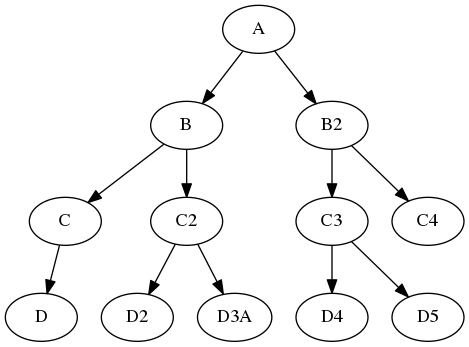

In [6]:
Image('graph.png')